In [1]:
def reproduceResult():
  seed_value= 0

  
  with tf.device("/cpu:0"):
    ...


  os.environ['PYTHONHASHSEED']=str(seed_value)
  np.random.seed(0)
  rn.seed(0)


  session_conf = tf.compat.v1.ConfigProto(intra_op_parallelism_threads=1, 
                                          inter_op_parallelism_threads=1)


  tf.compat.v1.set_random_seed(seed_value)
  sess = tf.compat.v1.Session(graph=tf.compat.v1.get_default_graph(), config=session_conf)
  tf.compat.v1.keras.backend.set_session(sess)
  tf.compat.v1.keras.backend.clear_session()

  


In [2]:
try:
  %tensorflow_version 2.x
except Exception:
  pass
  
import os 
import numpy as np
import tensorflow as tf
import random as rn
from tensorflow import keras

reproduceResult()
# %tensorflow_version 2.x
# import tensorflow as tf
# tf.test.gpu_device_name()
# from scipy import integrate
# import os
# import numpy as np
# from tensorflow import keras
import tempfile
import zipfile
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
# import tensorflow as tf
import tqdm


from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import backend as K


from tensorflow.keras import callbacks

from keras_lr_finder import LRFinder
from clr.clr_callback import CyclicLR

import tensorflow_model_optimization as tfmot



import keras_tuner
from kerastuner.tuners import RandomSearch
from kerastuner.engine.hyperparameters import HyperParameters
from attention import Attention

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import math


from keras.preprocessing.text import Tokenizer


import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.snowball import PorterStemmer
from sklearn import preprocessing


import gensim

C:\Users\moshi\AppData\Local\Temp\ipykernel_8668\1100260691.py:45: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  from kerastuner.tuners import RandomSearch


In [3]:
df = pd.read_csv('mental_health_dataset.csv',encoding= 'unicode_escape')

In [4]:
df.head

<bound method NDFrame.head of        Unnamed: 0                                        Description  \
0               0  I'm sorry about this post. It's gonna be a who...   
1               1  Been getting super high off high amounts of th...   
2               2  My brothers been shooting heroin/meth for the ...   
3               3  I rlly need an opinion cuz idk bout this stuff...   
4               4  Ive smoked weed since 8th grade in middle scho...   
...           ...                                                ...   
11736       11736  possible have satpathy ask question the questi...   
11737       11737                              god that was thorough   
11738       11738                      thread and meat kaun jat bhai   
11739       11739     not touch food with your left hand left handed   
11740       11740                     they say because they care for   

      Mental_State  
0        Addiction  
1        Addiction  
2        Addiction  
3        Addiction  


In [5]:
df.isnull()

,Unnamed: 0,Description,Mental_State
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
11736,False,False,False
11737,False,False,False
11738,False,False,False
11739,False,False,False


In [6]:
df.dropna(inplace=True)

In [7]:
df.groupby("Mental_State").describe()

Unnamed: 0                                     \
                            count          mean         std      min   
Mental_State                                                           
Addiction                   998.0    498.500000  288.242086      0.0   
Alcoholism                  999.0   1497.000000  288.530761    998.0   
Anxiety                    1024.0   2508.500000  295.747640   1997.0   
Aspergers                   799.0   3516.000000  230.795725   3117.0   
Bipolar                    1024.0   4427.500000  295.747640   3916.0   
Borderline Personality     1024.0   5720.500000  295.747640   5209.0   
Depression                 1024.0   7018.500000  295.747640   6507.0   
Schizophernia              1024.0   8149.500000  295.747640   7638.0   
SelfHarm                    746.0   9144.857909  215.894415   8772.0   
Suidal Thought             1024.0  10030.500000  295.747640   9519.0   
neutral                    1024.0  11228.500000  295.747640  10717.0   

                                                              
                             25%      50%       75%      max  
Mental_State                                                  
Addiction                 249.25    498.5    747.75    997.0  
Alcoholism               1247.50   1497.0   1746.50   1996.0  
Anxiety                  2252.75   2508.5   2764.25   3020.0  
Aspergers                3316.50   3516.0   3715.50   3915.0  
Bipolar                  4171.75   4427.5   4683.25   4939.0  
Borderline Personality   5464.75   5720.5   5976.25   6232.0  
Depression               6762.75   7018.5   7274.25   7530.0  
Schizophernia            7893.75   8149.5   8405.25   8661.0  
SelfHarm                 8958.25   9144.5   9331.75   9518.0  
Suidal Thought           9774.75  10030.5  10286.25  10542.0  
neutral                 10972.75  11228.5  11484.25  11740.0

In [8]:
df["Mental_State"].value_counts()

Anxiety                   1024
Bipolar                   1024
Borderline Personality    1024
Depression                1024
Schizophernia             1024
Suidal Thought            1024
neutral                   1024
Alcoholism                 999
Addiction                  998
Aspergers                  799
SelfHarm                   746
Name: Mental_State, dtype: int64

C:\Users\moshi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


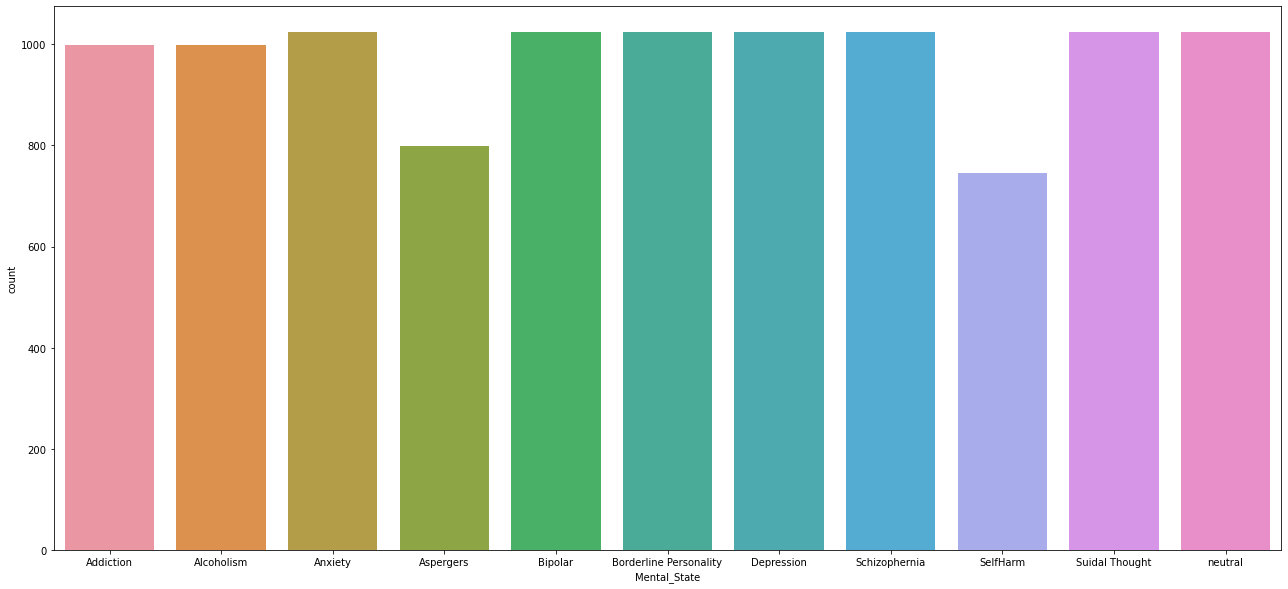

In [9]:
plt.subplots(figsize=(22,10))
sns.countplot(df["Mental_State"])
plt.show()

In [10]:
longest_string = max(df["Description"], key=len)
print(len(longest_string))

26163


In [11]:
import nltk

from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud,STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
from bs4 import BeautifulSoup

import re,string,unicodedata
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.stem import LancasterStemmer,WordNetLemmatizer

In [12]:
#Tokenization of text
tokenizer=ToktokTokenizer()
#Setting English stopwords
stopword_list=nltk.corpus.stopwords.words('english')

In [13]:
#Removing the html strips
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

#Removing the square brackets
def remove_between_square_brackets(text):
    return re.sub('\[[^]]*\]', '', text)

#Removing the noisy text
def denoise_text(text):
    text = strip_html(text)
    text = remove_between_square_brackets(text)
    return text
#Apply function on description column
df['Description']=df['Description'].apply(denoise_text)

C:\Users\moshi\anaconda3\lib\site-packages\bs4\__init__.py:435: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  warnings.warn(


In [14]:
#Stemming the text
def simple_stemmer(text):
    ps=nltk.porter.PorterStemmer()
    text= ' '.join([ps.stem(word) for word in text.split()])
    return text
#Apply function on description column
df['Description']=df['Description'].apply(simple_stemmer)

In [15]:
#set stopwords to english
stop=set(stopwords.words('english'))
print(stop)

#removing the stopwords
def remove_stopwords(text, is_lower_case=False):
    tokens = tokenizer.tokenize(text)
    tokens = [token.strip() for token in tokens]
    if is_lower_case:
        filtered_tokens = [token for token in tokens if token not in stopword_list]
    else:
        filtered_tokens = [token for token in tokens if token.lower() not in stopword_list]
    filtered_text = ' '.join(filtered_tokens)    
    return filtered_text
#Apply function on review column
df['Description']=df['Description'].apply(remove_stopwords)

{'a', 'this', 'your', 'him', 'won', 'has', "doesn't", 'needn', 'they', 'some', 'an', 'where', 'each', 'off', 'under', 'in', 'her', 'will', 'can', 'again', 'myself', 'hadn', "aren't", 'and', 'too', 'until', 'them', 'what', 't', 'more', 'out', "haven't", 'yourself', 'aren', 'further', 'before', 'couldn', 've', 'haven', "weren't", "hasn't", 'why', 'up', 'few', 'mightn', 'himself', 'do', 'hasn', 'but', 'are', 'yourselves', 'so', 'by', 'at', 'from', 'same', 'does', 'through', 'wouldn', 'doesn', 'down', "you'll", 'their', "shan't", 'it', 'wasn', 'for', 'am', "didn't", "it's", "wasn't", 'very', 'of', 'he', 'as', 'when', 'my', 'yours', 'into', 'shan', 'should', 'mustn', 'been', 'no', 'those', 'me', 'didn', 'than', "don't", 'only', 'having', 'while', 'the', 'all', 'ain', 'because', 're', 'theirs', 'just', 'our', 'isn', 'did', "mustn't", 'herself', 'other', 'nor', 'over', "that'll", "wouldn't", 'against', 'was', "you've", 'most', "isn't", 'these', 'here', 'll', 'ours', 'its', 'between', "you'd",

In [16]:
longest_string = max(df["Description"], key=len)
print(len(longest_string))

16724


In [17]:
train, test = train_test_split(df, test_size=0.2, stratify = df["Mental_State"], random_state = 42)
num_classes = 11
embed_num_dims = 300
max_seq_len = 50

x_train = train['Description']
x_test = test['Description']

y_train = train['Mental_State']
y_test = test['Mental_State']

texts_train = x_train
texts_test = x_test

tokenizer = Tokenizer()
tokenizer.fit_on_texts(train['Description'])

sequence_train = tokenizer.texts_to_sequences(texts_train)
sequence_test = tokenizer.texts_to_sequences(texts_test)

index_of_words = tokenizer.word_index

vocab_size = len(index_of_words) + 1

print('Number of unique words: {}'.format(len(index_of_words)))

X_train_pad = pad_sequences(sequence_train, maxlen = max_seq_len, padding='pre' )
X_test_pad = pad_sequences(sequence_test, maxlen = max_seq_len,  padding='pre')

print(X_train_pad)


encoding = {
    "neutral":0,
    "Suidal Thought":1,
    "Bipolar":2,
    "Borderline Personality":3,
    "Anxiety":4,
    "Schizophernia":5,
    "Alcoholism":6,
    "Depression":7,
    "Addiction":8,
    "Aspergers":9,
    "SelfHarm":10,
}

y_train = [encoding[x] for x in train['Mental_State']]
y_test = [encoding[x] for x in test['Mental_State']]



y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)


Number of unique words: 21468
[[   6  796 3268 ...   41    7  158]
 [   0    0    0 ...  732   44 3905]
 [ 663  437   67 ...  823 2390  171]
 ...
 [   0    0    0 ...   10  342 1783]
 [  15   30   50 ...  155   65  368]
 [ 270  104  650 ...    5 1114  171]]


In [18]:
#reading GloVe
def get_embedding_vectors(tokenizer, dim=300):
    embedding_index = {}
    with open('glove.840B.300d.txt','r', encoding="cp437", errors='ignore') as f:
        for line in tqdm.tqdm(f, "Reading GloVe"):
            values = line.split()
            word = ''.join(values[:-300])
            vectors = np.asarray(values[-300:], dtype='float32')
            embedding_index[word] = vectors

    word_index = tokenizer.word_index
    embedding_matrix = np.zeros((len(word_index)+1, dim))
    for word, i in word_index.items():
        embedding_vector = embedding_index.get(word)
        if embedding_vector is not None:
            # words not found will be 0s
            embedding_matrix[i] = embedding_vector
          
    return embedding_matrix

embedd_matrix= get_embedding_vectors(tokenizer)

print(embedd_matrix.shape)

Reading GloVe: 2196017it [04:03, 9006.30it/s] 


(21469, 300)


# Random Search


In [19]:
from tensorflow.keras import regularizers
import time
LOG_DIR = f"{int(time.time())}"
seed_value= 0



def build_model(hp):
  
  reproduceResult()

  print('Ya it comes here')
  fake_val = hp.Int("cnn_1_unit",min_value =16, max_value = 96, step = 16)
  cnn_1_unit = hp.Int("cnn_1_unit",min_value =16, max_value = 96, step = 16)
  cnn_1_dropout = hp.Float("cnn_1_dropout",min_value = 0.1,max_value = 0.3,step = 0.1)

  lstm_unit = hp.Int("lstm_unit",min_value =64, max_value = 256, step = 32)
  lstm_dropout = hp.Float("lstm_dropout",min_value = 0.1,max_value = 0.5,step = 0.1)




  seq_input = keras.layers.Input(shape=(max_seq_len,))

  embedded = keras.layers.Embedding(vocab_size,
                          embed_num_dims,
                          input_length = max_seq_len,
                          weights = [embedd_matrix])(seq_input)

  cnn = keras.layers.Conv1D(cnn_1_unit,3,kernel_regularizer=regularizers.l2(1e-4),
                            bias_regularizer=regularizers.l2(1e-2),
                            activity_regularizer=regularizers.l2(1e-4))(embedded)
  cnn = keras.layers.Activation(activation='relu')(cnn)
  cnn = keras.layers.BatchNormalization()(cnn)
  cnn = keras.layers.Dropout(cnn_1_dropout,seed=seed_value)(cnn)

  max_pooling = keras.layers.GlobalMaxPooling1D()(cnn)
  output = keras.layers.Dense(num_classes, activation='softmax')(max_pooling)

  model = keras.Model(inputs = [seq_input], outputs = output)
  model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
  
  model.summary()

  return model


stop = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy',
                              patience=4,
                              restore_best_weights=True,
                              verbose=0, mode='max')


clr_step_size = int((len(X_train_pad)/64))
base_lr = 1e-3
max_lr = 6e-3
mode = 'exp_range'


clr = CyclicLR(base_lr = base_lr, max_lr = max_lr, step_size = clr_step_size, mode = mode)



tuner = RandomSearch(
    build_model,
    objective = keras_tuner.Objective('val_accuracy', direction="max"),
    max_trials = 40,
    executions_per_trial = 1,
    directory = LOG_DIR
    )
  
tuner.search(x=X_train_pad,y = y_train,epochs = 35, batch_size = 64,callbacks = [stop,clr], 
             validation_data = (X_test_pad,y_test))


tuner.results_summary()

Trial 40 Complete [00h 01m 03s]
val_accuracy: 0.5985060930252075

Best val_accuracy So Far: 0.6195144653320312
Total elapsed time: 00h 51m 43s
INFO:tensorflow:Oracle triggered exit
Results summary
Results in 1668933866\untitled_project
Showing 10 best trials
Trial summary
Hyperparameters:
cnn_1_unit: 96
cnn_1_dropout: 0.30000000000000004
lstm_unit: 96
lstm_dropout: 0.5
Score: 0.6195144653320312
Trial summary
Hyperparameters:
cnn_1_unit: 96
cnn_1_dropout: 0.30000000000000004
lstm_unit: 96
lstm_dropout: 0.2
Score: 0.6195144653320312
Trial summary
Hyperparameters:
cnn_1_unit: 64
cnn_1_dropout: 0.30000000000000004
lstm_unit: 128
lstm_dropout: 0.4
Score: 0.6129785180091858
Trial summary
Hyperparameters:
cnn_1_unit: 48
cnn_1_dropout: 0.30000000000000004
lstm_unit: 160
lstm_dropout: 0.30000000000000004
Score: 0.6008403301239014
Trial summary
Hyperparameters:
cnn_1_unit: 64
cnn_1_dropout: 0.1
lstm_unit: 160
lstm_dropout: 0.4
Score: 0.599439799785614
Trial summary
Hyperparameters:
cnn_1_unit: 6

In [20]:
tuner.search_space_summary()

Search space summary
Default search space size: 4
cnn_1_unit (Int)
{'default': None, 'conditions': [], 'min_value': 16, 'max_value': 96, 'step': 16, 'sampling': None}
cnn_1_dropout (Float)
{'default': 0.1, 'conditions': [], 'min_value': 0.1, 'max_value': 0.3, 'step': 0.1, 'sampling': None}
lstm_unit (Int)
{'default': None, 'conditions': [], 'min_value': 64, 'max_value': 256, 'step': 32, 'sampling': None}
lstm_dropout (Float)
{'default': 0.1, 'conditions': [], 'min_value': 0.1, 'max_value': 0.5, 'step': 0.1, 'sampling': None}


In [21]:
best_hps = tuner.get_best_hyperparameters(5)
# Build the model with the best hp.
model = build_model(best_hps[0])

Ya it comes here
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 50)]              0         
                                                                 
 embedding (Embedding)       (None, 50, 300)           6440700   
                                                                 
 conv1d (Conv1D)             (None, 48, 96)            86496     
                                                                 
 activation (Activation)     (None, 48, 96)            0         
                                                                 
 batch_normalization (BatchN  (None, 48, 96)           384       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 48, 96)            0         
                                            

In [22]:
history = model.fit(x=X_train_pad,y = y_train,epochs = 35, batch_size = 64,callbacks = [stop,clr], 
             validation_data = (X_test_pad,y_test))

Epoch 1/35
134/134 [==============================] - 9s 63ms/step - loss: 2.5231 - accuracy: 0.3786 - val_loss: 1.7607 - val_accuracy: 0.5056
Epoch 2/35
134/134 [==============================] - 8s 62ms/step - loss: 1.2955 - accuracy: 0.6528 - val_loss: 1.4227 - val_accuracy: 0.5952
Epoch 3/35
134/134 [==============================] - 8s 61ms/step - loss: 0.8117 - accuracy: 0.7989 - val_loss: 1.7281 - val_accuracy: 0.5392
Epoch 4/35
134/134 [==============================] - 8s 63ms/step - loss: 0.7664 - accuracy: 0.8212 - val_loss: 1.4561 - val_accuracy: 0.6074
Epoch 5/35
134/134 [==============================] - 8s 61ms/step - loss: 0.4505 - accuracy: 0.9177 - val_loss: 1.6013 - val_accuracy: 0.5934
Epoch 6/35
134/134 [==============================] - 8s 62ms/step - loss: 0.4801 - accuracy: 0.9127 - val_loss: 1.5556 - val_accuracy: 0.6195
Epoch 7/35
134/134 [==============================] - 8s 63ms/step - loss: 0.3294 - accuracy: 0.9588 - val_loss: 1.7106 - val_accuracy: 0.5952

In [23]:
def PlotGraph(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'g', label='Training acc')
    plt.plot(x, val_acc, 'b', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'g', label='Training loss')
    plt.plot(x, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

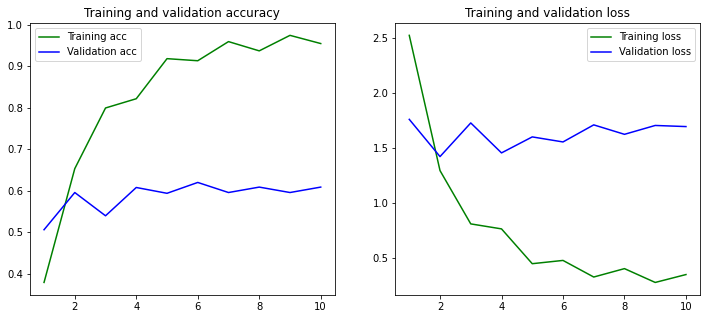

In [24]:
PlotGraph(history)

In [25]:
class_names = ["Neutral",
    "Suicidal Thought",
    "Bipolar",
    "BPD",
    "Anxiety",
    "Schizophrenia",
    "Alcoholism",
    "Depression",
    "Addiction",
    "Aspergers",
    "Self Harm",]

In [26]:
predict = model.predict(X_test_pad)
predict_class = np.argmax(predict, axis=1)
predict_class = np.array(predict_class)
predict_class

array([4, 2, 7, ..., 0, 2, 9], dtype=int64)

In [27]:
predict_lables=np.argmax(y_test, axis=1)
predict_lables

array([7, 2, 2, ..., 0, 2, 1], dtype=int64)

In [28]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(predict_lables, predict_class)
cm

array([[191,   0,   1,   1,   2,   2,   1,   2,   2,   2,   1],
       [  6,  80,   9,  13,  21,   6,   3,  42,   5,  13,   7],
       [  3,  10, 116,  11,  21,   6,   7,  14,   6,   5,   6],
       [  1,  11,  17, 101,  16,  10,   4,  14,   7,  14,  10],
       [  1,   6,  16,   6, 128,   9,   6,  13,   2,  15,   3],
       [  7,   3,  20,   9,  16, 117,   3,  13,   6,   6,   5],
       [  1,   0,   3,   2,   7,   5, 155,   2,  17,   5,   2],
       [  4,  34,   6,  14,  25,   8,   5,  90,   5,   8,   6],
       [  0,   3,   4,   4,   9,   2,  20,   4, 140,   8,   5],
       [  0,   3,   5,   8,  12,   5,   2,   6,   8, 105,   6],
       [  4,   2,   5,   4,   4,   4,   4,   7,   7,   4, 104]],
      dtype=int64)

<AxesSubplot:>

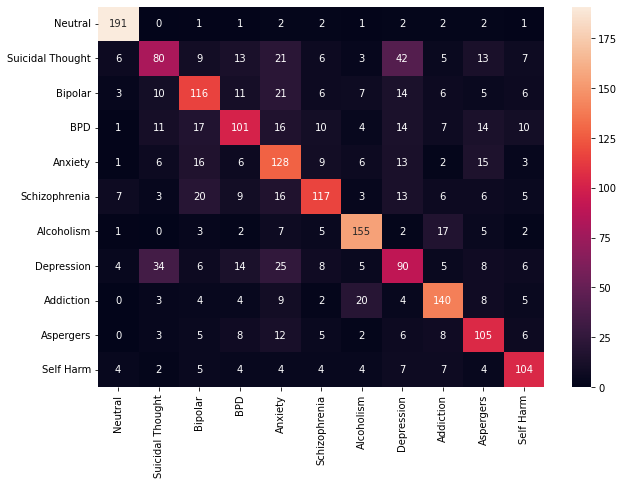

In [29]:
df_cm = pd.DataFrame(cm, index=class_names,columns=class_names)
plt.figure(figsize = (10,7))
sns.heatmap(df_cm,annot=True, fmt ="d")

In [30]:
from sklearn.metrics import classification_report

print(classification_report(predict_lables, predict_class, target_names =class_names))

                  precision    recall  f1-score   support

         Neutral       0.88      0.93      0.90       205
Suicidal Thought       0.53      0.39      0.45       205
         Bipolar       0.57      0.57      0.57       205
             BPD       0.58      0.49      0.53       205
         Anxiety       0.49      0.62      0.55       205
   Schizophrenia       0.67      0.57      0.62       205
      Alcoholism       0.74      0.78      0.76       199
      Depression       0.43      0.44      0.44       205
       Addiction       0.68      0.70      0.69       199
       Aspergers       0.57      0.66      0.61       160
       Self Harm       0.67      0.70      0.68       149

        accuracy                           0.62      2142
       macro avg       0.62      0.62      0.62      2142
    weighted avg       0.62      0.62      0.62      2142

